In [2]:
print("""
@File         : mastering_vectorized_backtesting.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-05-06 15:32:45
@Email        : cuixuanstephen@gmail.com
@Description  : 
""")


@File         : mastering_vectorized_backtesting.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-05-06 15:32:45
@Email        : cuixuanstephen@gmail.com
@Description  : 



In [5]:
%cd ../../

d:\Quantitative\P4AT


In [6]:
import pandas as pd

raw = pd.read_csv(
    "data/aiif_eikon_eod_data.csv", index_col=0, parse_dates=True
).dropna()

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [11]:
data = pd.DataFrame(raw['EUR='])

In [12]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [14]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

In [15]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'serif'

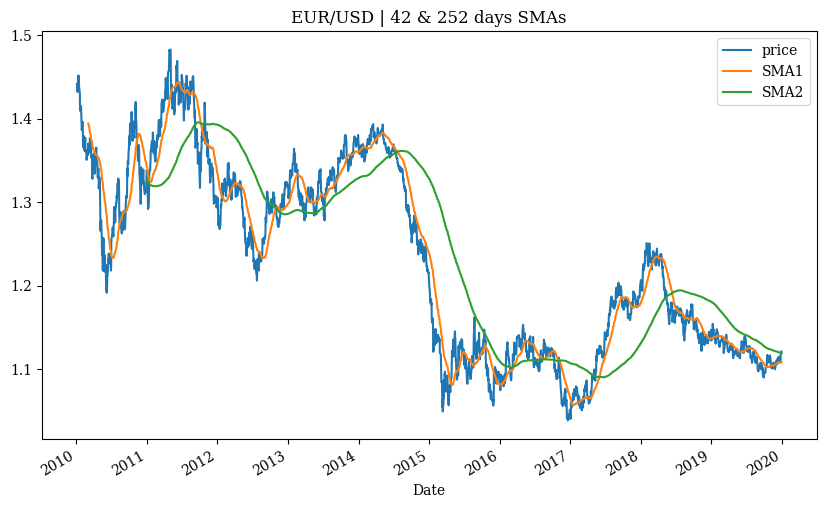

In [24]:
data.plot(title='EUR/USD | 42 & 252 days SMAs',
          figsize=(10, 6))
plt.show()

In [27]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data.dropna(inplace=True)

<Axes: title={'center': 'Market Positioning'}, xlabel='Date'>

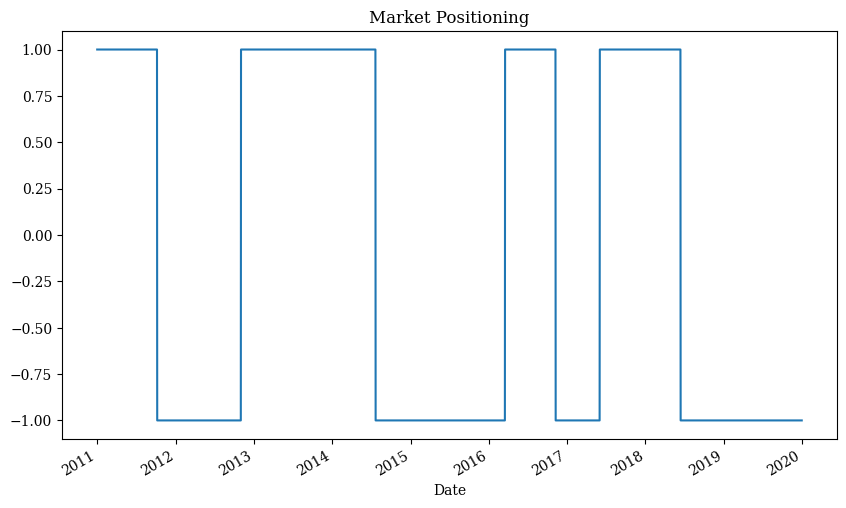

In [29]:
data['position'].plot(ylim=[-1.1, 1.1],
                      title='Market Positioning',
                      figsize=(10, 6))

In [31]:
data['returns'] = np.diff(np.log(data['price']), prepend=np.nan)

<Axes: >

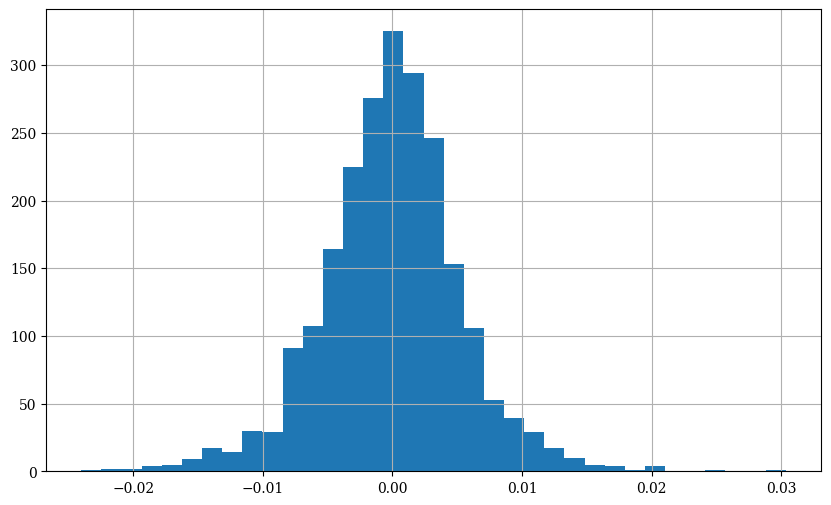

In [33]:
data['returns'].hist(bins=35, figsize=(10, 6))

In [34]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [35]:
data[['returns', 'strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [36]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

<Axes: xlabel='Date'>

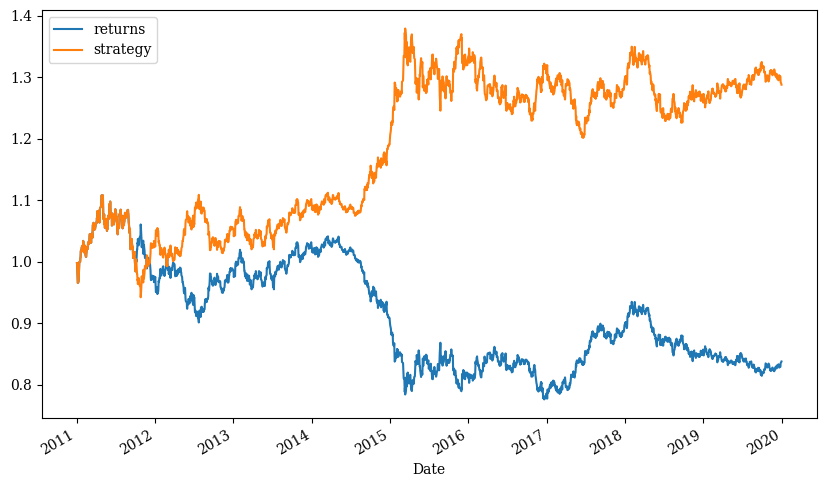

In [37]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [40]:
data[['returns', 'strategy']].mean() * 252

returns    -0.019671
strategy    0.028174
dtype: float64

In [41]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns    -0.019479
strategy    0.028575
dtype: float64

In [42]:
data[['returns', 'strategy']].std() * np.sqrt(252)

returns     0.085414
strategy    0.085405
dtype: float64

In [44]:
(np.exp(data[['returns', 'strategy']]) - 1).std() * np.sqrt(252)

returns     0.085405
strategy    0.085373
dtype: float64

In [45]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)
data['cummax'] = data['cumret'].cummax()

<Axes: xlabel='Date'>

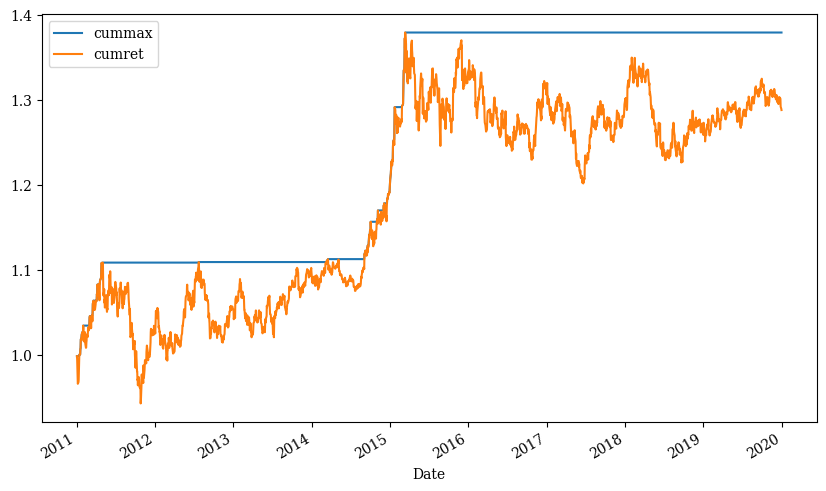

In [47]:
data[['cummax', 'cumret']].dropna().plot(figsize=(10, 6))

In [55]:
drawdown = data['cummax'] - data['cumret']

In [56]:
# drawdown = (data['cummax'] - data['cumret']) / (data['cummax'])

In [57]:
drawdown.max()

0.17779367070195984

In [58]:
temp = drawdown[drawdown == 0]

In [82]:
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())
# np.diff(temp.index.to_pydatetime()).max()

In [83]:
periods[-3:]

array([datetime.timedelta(days=4), datetime.timedelta(days=1),
       datetime.timedelta(days=2)], dtype=object)

In [84]:
periods.max()

datetime.timedelta(days=596)

In [2]:
from utils.strategy.sma import SMAVectorBacktest

smabt = SMAVectorBacktest("EUR=", 42, 252, '2010-01-01', '2019-12-31')

In [3]:
smabt.run_strategy()

(1.288, 0.45)

In [4]:
%%time
smabt.optimize_parameters((30, 50, 2), (200, 300, 2))

CPU times: total: 1.59 s
Wall time: 2.06 s


(array([ 48., 238.]), 1.5)

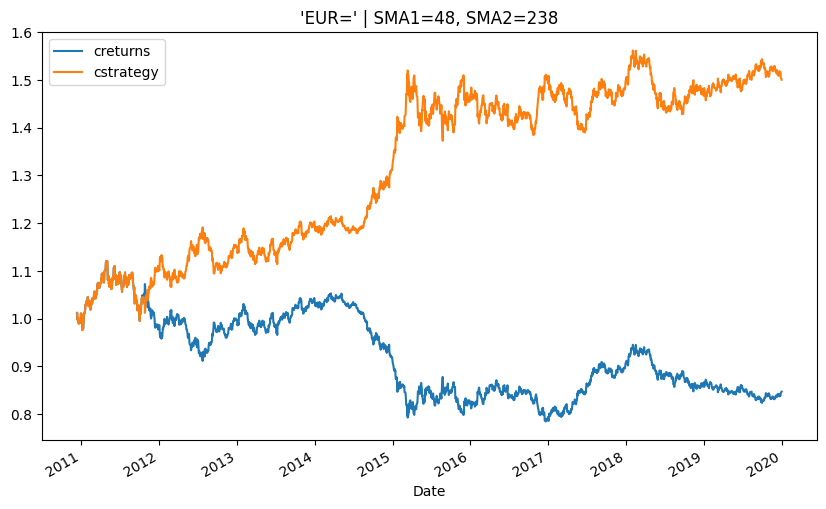

In [5]:
smabt.plot_results()

## 基于动量的策略

In [8]:
data = pd.DataFrame(raw['XAU='])

In [10]:
data.rename(columns={'XAU=':'price'}, inplace=True)

In [13]:
data['returns'] = data['price'].apply(np.log).diff()

<Axes: xlabel='Date'>

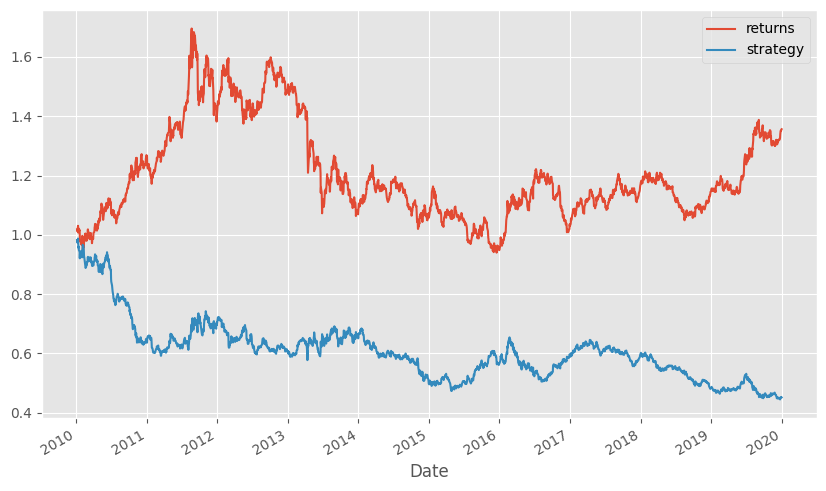

In [21]:
data['position'] = np.sign(data['returns'])
data['strategy'] = data['position'].shift(1) * data['returns']

data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

<Axes: xlabel='Date'>

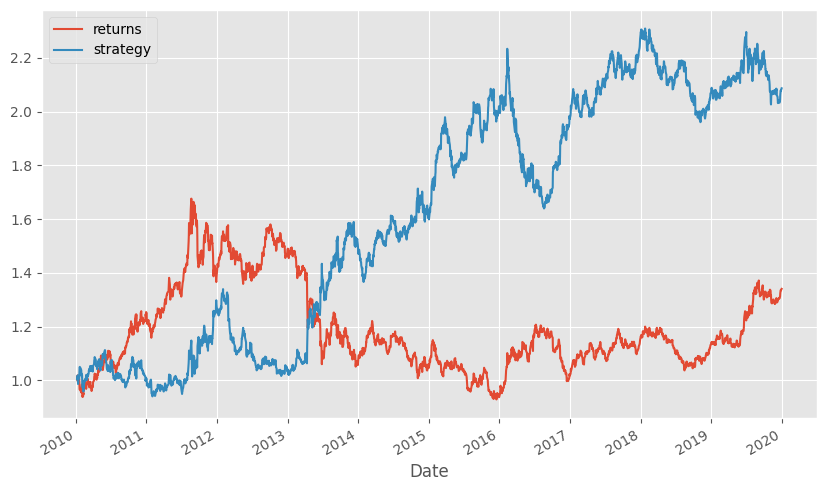

In [30]:
data['position'] = np.sign(data['returns'].rolling(window=3).mean())

data['strategy'] = data['position'].shift(1) * data['returns']

data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

<Axes: xlabel='Date'>

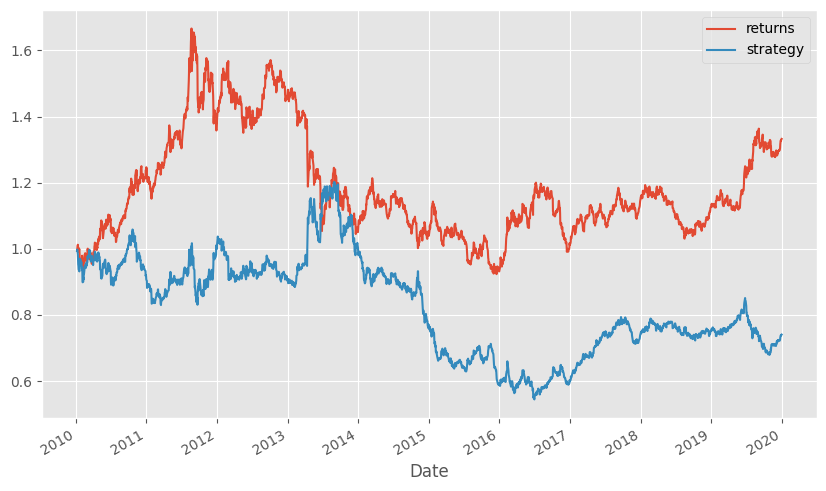

In [31]:
data['position'] = np.sign(data['returns'].rolling(window=2).mean())

data['strategy'] = data['position'].shift(1) * data['returns']

data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

In [45]:
# fn = 'data/AAPL_1min_05052020.csv'
fn = 'data/SPX_1min_05052020.csv'

In [61]:
data = pd.read_csv(fn, index_col=0, parse_dates=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-05-05 16:00:00 to 2020-05-05 20:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    241 non-null    float64
 1   LOW     241 non-null    float64
 2   OPEN    241 non-null    float64
 3   CLOSE   241 non-null    float64
 4   COUNT   241 non-null    float64
dtypes: float64(5)
memory usage: 11.3 KB


In [63]:
data['returns'] = data['CLOSE'].apply(np.log).diff()
to_plot = ['returns']

In [64]:
for m in [1, 3, 5, 7, 9]:
    data[f'position_{m}'] = np.sign(data['returns'].rolling(m).mean())
    data[f'strategy_{m}'] = (data[f'position_{m}'].shift(1) * data['returns'])
    to_plot.append(f'strategy_{m}')

<Axes: xlabel='Date'>

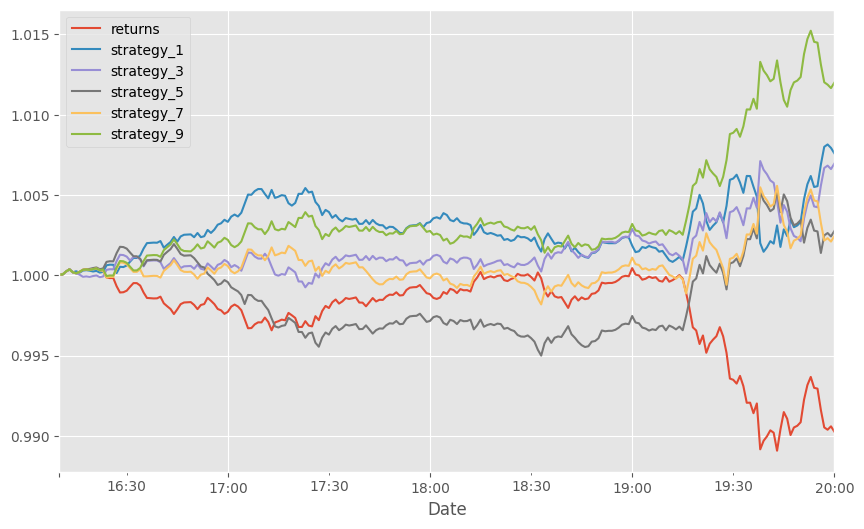

In [65]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

## 基于均线回归的策略

In [66]:
data = pd.DataFrame(raw['GDX'])
data.rename(columns={'GDX': 'price'}, inplace=True)

In [67]:
data['returns'] = data['price'].apply(np.log).diff()
SMA = 25
data['SMA'] = data['price'].rolling(SMA).mean()

In [72]:
threshold = 3.5

In [68]:
data['distance'] = data['price'] - data['SMA']

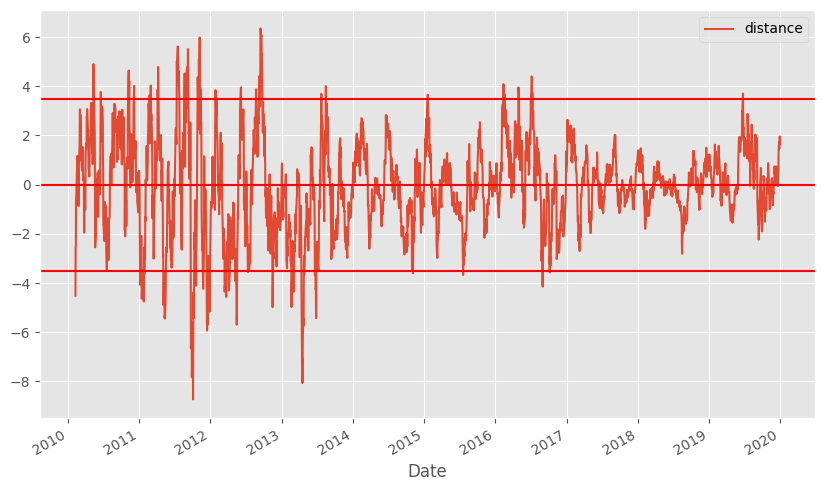

In [73]:
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r');

In [127]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])
# If there is a change in the sign of the distance value, go market neutral (set 0),
# otherwise keep the column position unchanged.
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])
data['position'] = data['position'].ffill().fillna(0)

<Axes: xlabel='Date'>

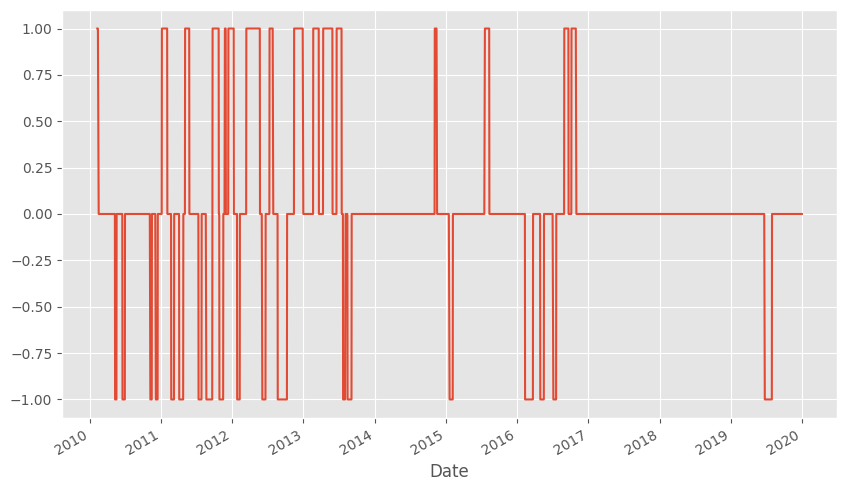

In [128]:
data['position'].iloc[SMA:].plot(figsize=(10, 6))

In [131]:
data['strategy'] = data['position'].shift(1) * data['returns']

<Axes: xlabel='Date'>

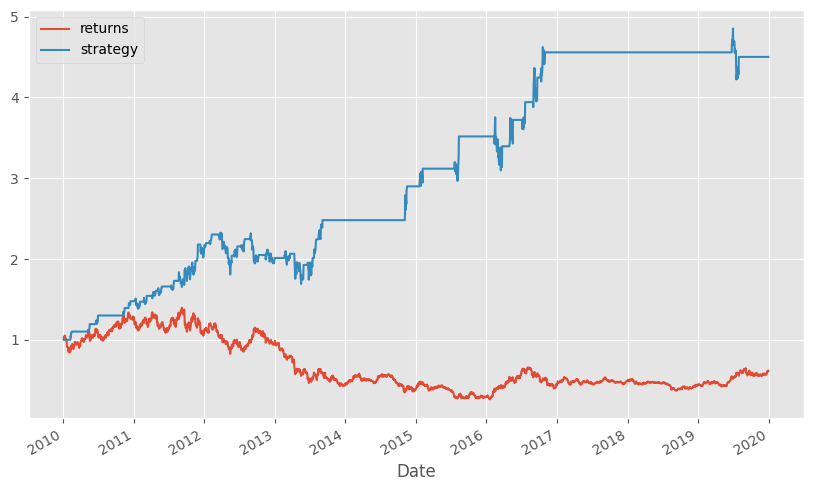

In [132]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))